<a href="https://colab.research.google.com/github/JCaceres-R/alura-store-data-analysis/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


mtiendas = [tienda1, tienda2, tienda3, tienda4]
nombresTiendas = ["tienda_1", "tienda_2", "tienda_3", "tienda_4"]


# 0. EDA (Analisis explratorio de los datos)

In [2]:
tienda1

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


## Analisis de tipo de datos y datos nulos

1. no hay valores nulos en ninguna de los df
2. el df tienda 4 tiene 1 fila menos que todas las  demas (2358)
3. el dtype se describe en la siguiente tabla
4. no hay calificacion = 0 tampoco precio = 0
5. comberti la fecha de entrega de string(object) a datatime

| # | Columna                | Non-Null Count | Dtype   |
|---|------------------------|----------------|----------|
| 0 | Producto               | 2359 non-null  | object   |
| 1 | Categoría del Producto | 2359 non-null  | object   |
| 2 | Precio                 | 2359 non-null  | float64  |
| 3 | Costo de envío         | 2359 non-null  | float64  |
| 4 | Fecha de Compra        | 2359 non-null  | datetime64[ns]   |
| 5 | Vendedor               | 2359 non-null  | object   |
| 6 | Lugar de Compra        | 2359 non-null  | object   |
| 7 | Calificación           | 2359 non-null  | int64    |
| 8 | Método de pago         | 2359 non-null  | object   |
| 9 | Cantidad de cuotas     | 2359 non-null  | int64    |
| 10| lat                    | 2359 non-null  | float64  |
| 11| lon                    | 2359 non-null  | float64  |


In [3]:
tienda1["Fecha de Compra"] = pd.to_datetime(
    tienda1["Fecha de Compra"],
    dayfirst=True,   # porque tu formato es DD/MM/AAAA
)
print(tienda1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje


##Consistencia de datos
Comprobando valores unicos

In [4]:
tienda1[(tienda1["Producto"] == "Mesa de comedor") & (tienda1["Cantidad de cuotas"] == 1)]


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
186,Mesa de comedor,Muebles,217000.0,9700.0,2021-09-14,Pedro Gomez,Pereira,1,Cupón,1,4.81333,-75.69611
220,Mesa de comedor,Muebles,160300.0,9200.0,2020-10-25,Lucas Olivera,Bogotá,4,Nequi,1,4.60971,-74.08175
226,Mesa de comedor,Muebles,218600.0,12300.0,2021-02-21,Lucas Olivera,Cali,1,Nequi,1,3.43722,-76.52250
238,Mesa de comedor,Muebles,338900.0,18700.0,2022-02-10,Pedro Gomez,Bogotá,5,Nequi,1,4.60971,-74.08175
256,Mesa de comedor,Muebles,176300.0,7600.0,2020-12-11,Ángel Rodriguez,Bogotá,4,Tarjeta de crédito,1,4.60971,-74.08175
382,Mesa de comedor,Muebles,228400.0,20000.0,2023-03-31,Felipe Santos,Bogotá,3,Nequi,1,4.60971,-74.08175
401,Mesa de comedor,Muebles,157900.0,13200.0,2021-05-02,Felipe Santos,Bogotá,3,Tarjeta de crédito,1,4.60971,-74.08175
644,Mesa de comedor,Muebles,317200.0,17100.0,2020-01-29,Camila Rivera,Barranquilla,1,Tarjeta de crédito,1,10.96854,-74.78132
661,Mesa de comedor,Muebles,214800.0,12500.0,2021-03-09,Blanca Ramirez,Cúcuta,5,Tarjeta de crédito,1,7.89391,-72.50782
804,Mesa de comedor,Muebles,185600.0,8100.0,2020-12-27,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


In [5]:
#Comprobando valores unicos
#Consistencia de datos
for df in mtiendas:
    for col in df.columns:
        (f"\n→ Columna: {col}")
        (df[col].value_counts())

##Analisis Descriptivo

In [6]:
for i,df in enumerate(mtiendas):
  print(f"\ntienda numero {i+1}")
  print(df.describe())


tienda numero 1
             Precio  Costo de envío                Fecha de Compra  \
count  2.359000e+03     2359.000000                           2359   
mean   4.878679e+05    26018.609580  2021-08-17 12:02:08.189911296   
min    7.600000e+03        0.000000            2020-01-01 00:00:00   
25%    5.575000e+04     3100.000000            2020-10-26 00:00:00   
50%    2.353000e+05    12400.000000            2021-08-23 00:00:00   
75%    6.781000e+05    36000.000000            2022-06-06 00:00:00   
max    2.977000e+06   160800.000000            2023-03-31 00:00:00   
std    6.146868e+05    32860.001783                            NaN   

       Calificación  Cantidad de cuotas          lat          lon  
count   2359.000000         2359.000000  2359.000000  2359.000000  
mean       3.976685            2.943196     5.365283   -74.789417  
min        1.000000            1.000000    -4.215280   -77.281110  
25%        3.000000            1.000000     4.609710   -75.563590  
50%        5

#1. Análisis de facturación



##Ingreso total por cada tienda

El ingreso de la tienda #1 es: 1,150,880,400
El ingreso de la tienda #2 es: 1,116,343,500
El ingreso de la tienda #3 es: 1,098,019,600
El ingreso de la tienda #4 es: 1,038,375,700


Text(0.5, 1.0, 'Ingreso Total por Tienda')

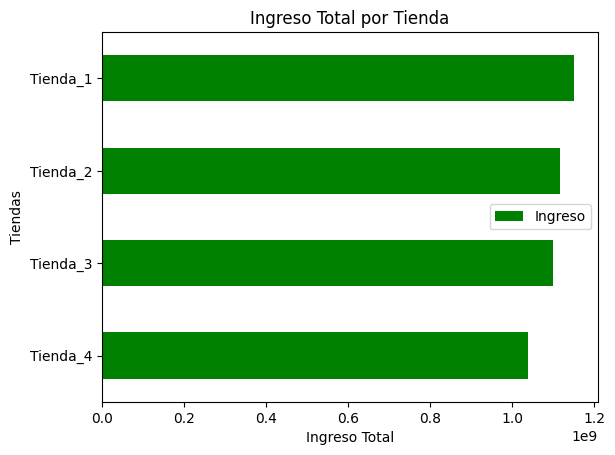

In [26]:
arr = []
for i, df in enumerate(mtiendas):
    ingreso = df["Precio"].sum()
    print(f"El ingreso de la tienda #{i+1} es: {ingreso:,.0f}")
    arr.append(ingreso)

df_valores = pd.DataFrame(arr, columns=['Ingreso'])
df_valores.index = [f'Tienda_{i+1}' for i in range(len(arr))]  # Cambiar los índices
df_valores.index.name = 'Tiendas'

ax = df_valores.sort_values(by='Ingreso', ascending=True).plot(kind='barh', color='green')
ax.set_xlabel("Ingreso Total")
ax.set_ylabel("Tiendas")
ax.set_title("Ingreso Total por Tienda")



# 2. Ventas por categoría

##Valor neto por categoria

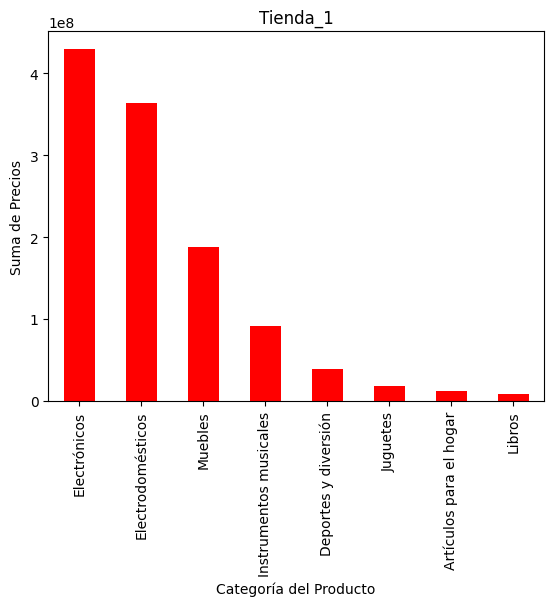

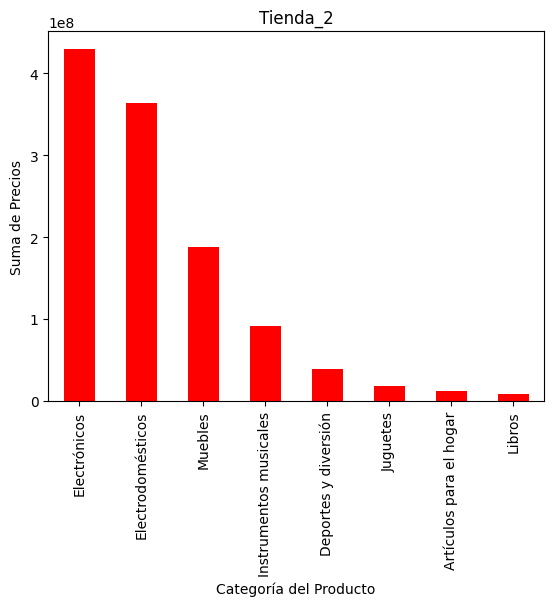

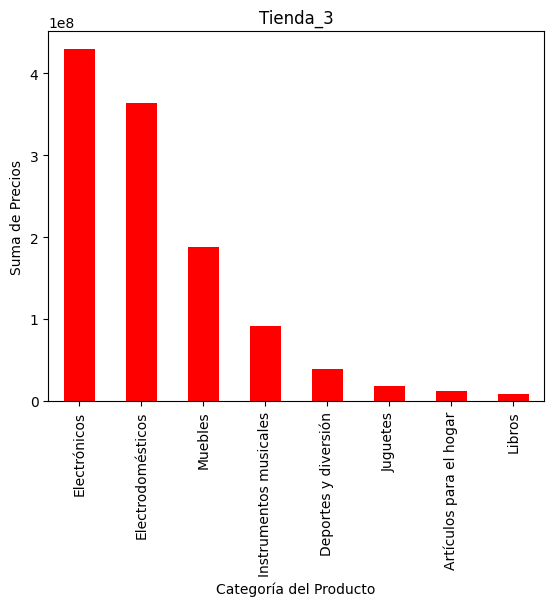

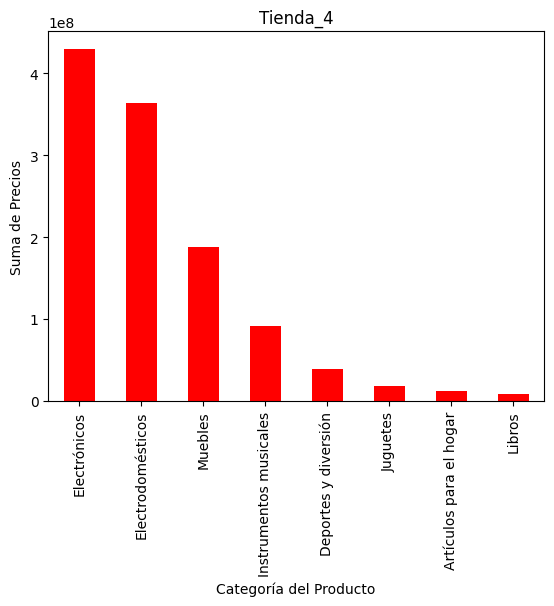

In [8]:
for i,df_categoria_valorneto in enumerate(mtiendas):
  df_categoria_valorneto = tienda1.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
  ax = df_categoria_valorneto.plot(kind='bar', color='red')
  ax.set_xlabel("Categoría del Producto")
  ax.set_ylabel("Suma de Precios")
  ax.set_title(f"Tienda_{i+1}")
  plt.show()


In [9]:

for i,df in enumerate(mtiendas):
  print(f"\ntienda numero {i+1}")
  valortotal=df["Precio"].sum()
  df_valorneto = df.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
  temp = df_valorneto.head(3).sum()
  temp = (temp * 100) / valortotal
  print(f"Procentaje del top 3 : {temp}")


tienda numero 1
Procentaje del top 3 : 85.22279117795385

tienda numero 2
Procentaje del top 3 : 83.8295022992475

tienda numero 3
Procentaje del top 3 : 85.70755931861325

tienda numero 4
Procentaje del top 3 : 85.2548070992031


# 3. Calificación promedio de la tienda


Tienda  #1 tiene una valoración de: 3.98
Tienda  #2 tiene una valoración de: 4.04
Tienda  #3 tiene una valoración de: 4.05
Tienda  #4 tiene una valoración de: 4.00


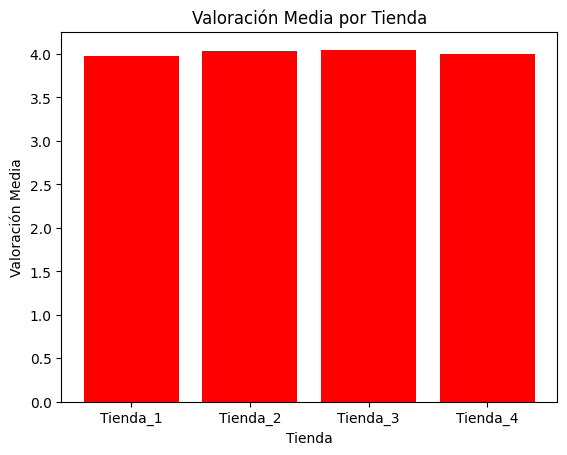

In [22]:
medias = []
for i, df in enumerate(mtiendas):
    media = df["Calificación"].mean()
    medias.append(media)
    print(f"Tienda  #{i+1} tiene una valoración de: {media:.2f}")

tiendas_grafiaMedia = [f"Tienda_{i+1}" for i in range(len(medias))]
plt.bar(tiendas_grafiaMedia, medias, color='red')
plt.xlabel("Tienda")
plt.ylabel("Valoración Media")
plt.title("Valoración Media por Tienda")
plt.show()

# 4. Productos más y menos vendidos

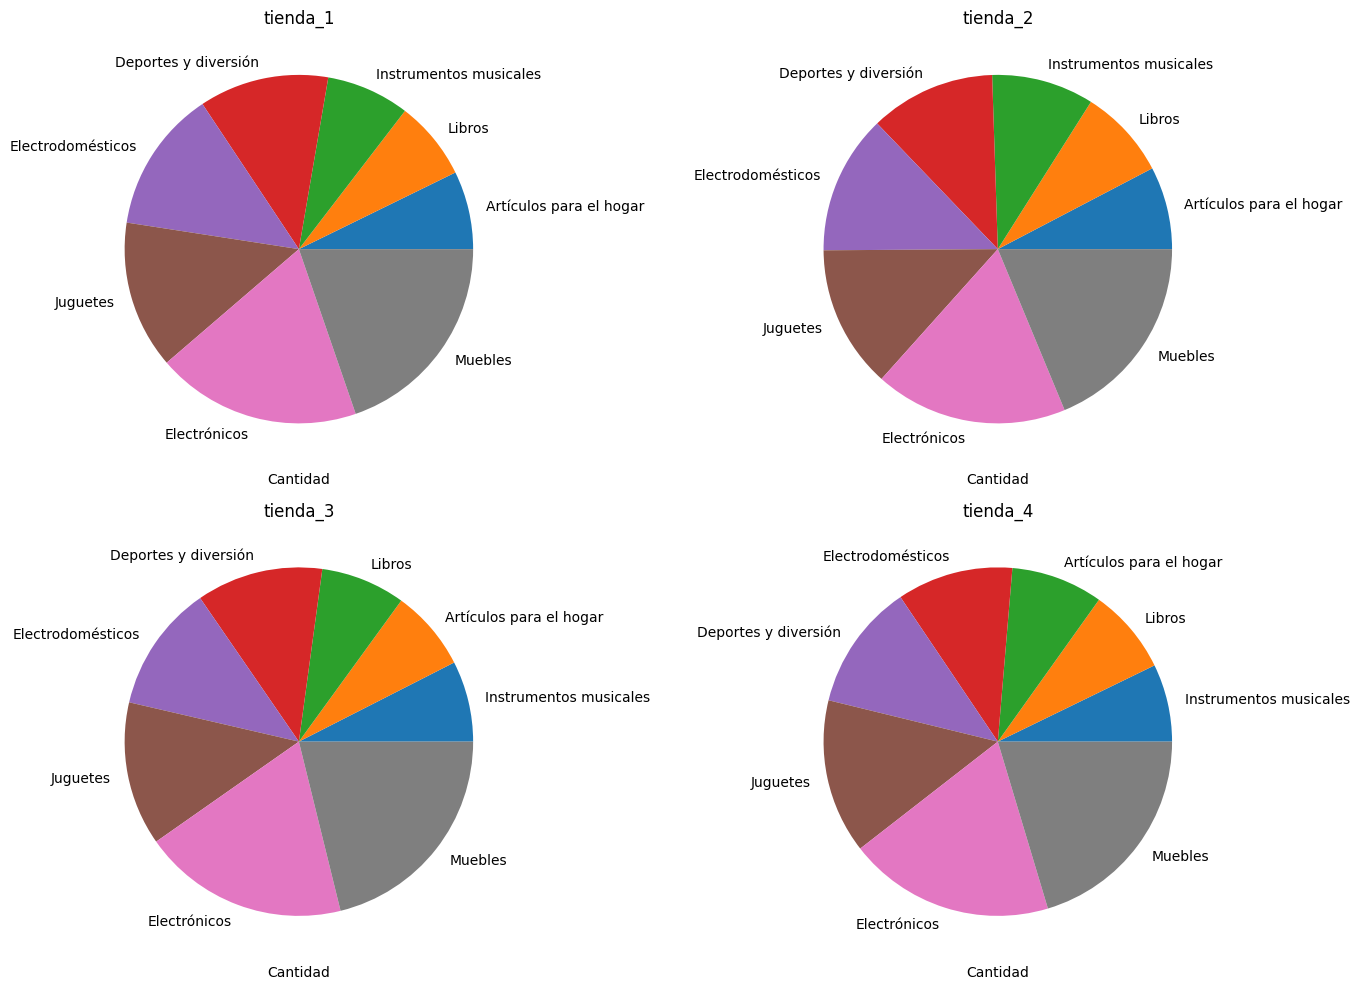

In [11]:
#Ventas por porcentaje de categoria
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for i, (df, ax, name) in enumerate(zip(mtiendas,axes.flatten(),nombresTiendas)):
    df["Categoría del Producto"].value_counts(normalize=True).sort_values(ascending=True).plot(
    kind='pie',color='purple',ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Cantidad')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

En la grafica se puede observar un comportamiento similar(una tendencia) en las 4 tiendas los 3 primero productos siempre son muebles, electronicos y jugetes lo que sumados representan casi un 50% de las ventas para los 4 casos

In [23]:
for i,df in enumerate(mtiendas):
  print(f"\ntienda numero {i+1}")
  temp = df["Categoría del Producto"].value_counts(normalize=True).head(3).sum()*100
  print(f"Procentaje del top 3 : {temp:.2f}")


tienda numero 1
Procentaje del top 3 : 52.44

tienda numero 2
Procentaje del top 3 : 49.89

tienda numero 3
Procentaje del top 3 : 53.62

tienda numero 4
Procentaje del top 3 : 53.82


La gráfica muestra una tendencia consistente en las cuatro tiendas: las categorías que más ingresos generan son Electrónicos, Electrodomésticos y Muebles. Estas tres categorías, en conjunto, concentran la mayor parte del ingreso en promedio aportan más del 85 % del valor neto por tienda. En contraste, las categorías con menor aporte económico son Libros, Juguetes y Artículos para el hogar.

Si evaluamos por unidades vendidas, el top 3 de categorías concentra aproximadamente la mitad del volumen total (≈50 %). Sin embargo, al ponderar por valor (precio) es decir, la contribución al ingreso la concentración aumenta notablemente: las mismas tres categorías explican más del 85 % del ingreso total. Esto indica que, aunque el volumen puede distribuirse de forma relativamente más amplia, el valor está fuertemente concentrado en pocas categorías.

# 5. Envío promedio por tienda

Tienda  #1 tiene un costo de envio medio de: 26018.61
Tienda  #2 tiene un costo de envio medio de: 25216.24
Tienda  #3 tiene un costo de envio medio de: 24805.68
Tienda  #4 tiene un costo de envio medio de: 23459.46


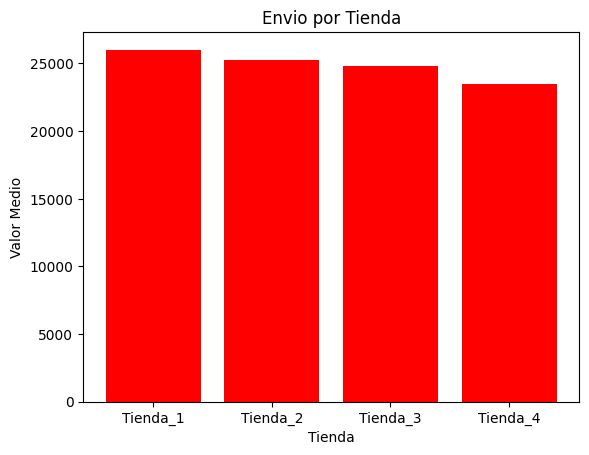

In [25]:
envioM = []
for i, df in enumerate(mtiendas):
    media = df["Costo de envío"].mean()
    envioM.append(media)
    print(f"Tienda  #{i+1} tiene un costo de envio medio de: {media:.2f}")
tiendas_grafiaenvioM = [f"Tienda_{i+1}" for i in range(len(envioM))]
plt.bar(tiendas_grafiaenvioM, envioM, color='red')
plt.xlabel("Tienda")
plt.ylabel("Valor Medio")
plt.title("Envio por Tienda")
plt.show()

Se observa que la tienda 1, es la tienda con mayor costo de envio medio mientras que la tienda 4 es la que menos costo de envio tiene, con una diferencia de 2559, lo que representa una diferencia practicamente nula si se compara con los ingresos totales de cada tienda, esta diferencia no representa nada

# Informe final — Recomendación de venta de tienda

## Introducción
El objetivo de este informe es analizar el desempeño de cuatro tiendas con el fin de recomendar al Sr. Juan cuál de ellas debería vender. Para ello, se evaluaron múltiples factores cuantitativos y cualitativos, entre ellos los ingresos totales, las categorías de productos más y menos vendidas, la concentración de ventas en los productos más relevantes, la valoración promedio de los clientes y el coste promedio de envío. El análisis se apoya en los datos obtenidos y en las visualizaciones generadas durante el proceso.

## Análisis de ingresos
Los ingresos totales muestran diferencias claras entre las tiendas:

- Tienda 1: 1.150.880.400  
- Tienda 2: 1.116.343.500  
- Tienda 3: 1.098.019.600  
- Tienda 4: 1.038.375.700  

A partir de estos resultados, la Tienda 1 presenta el mejor desempeño en términos de ingresos, mientras que la Tienda 4 es la que registra el menor ingreso total. Aunque las diferencias no son extremadamente grandes, la Tienda 4 se mantiene consistentemente por debajo de las demás.

## Categorías y productos más y menos vendidos
Las gráficas evidencian un patrón común en las cuatro tiendas. Las categorías que generan mayores ingresos son Electrónicos, Electrodomésticos y Muebles. En promedio, estas tres categorías concentran más del 85 % del valor neto de las ventas en cada tienda. Por el contrario, las categorías con menor aporte económico son Libros, Juguetes y Artículos para el hogar.

Al analizar la concentración de ventas, se observa que los tres productos más vendidos de cada tienda representan un porcentaje muy alto del ingreso total:

- Tienda 1: 85,22 %  
- Tienda 2: 83,83 %  
- Tienda 3: 85,71 %  
- Tienda 4: 85,25 %  

Esto indica que el ingreso está fuertemente concentrado en un número reducido de productos, y que este comportamiento es similar en todas las tiendas.

## Valoración de los clientes
Las calificaciones promedio otorgadas por los clientes son muy similares entre tiendas:

- Tienda 1: 3,98  
- Tienda 2: 4,04  
- Tienda 3: 4,05  
- Tienda 4: 4,00  

Las diferencias son mínimas, por lo que la valoración de los clientes no representa un factor decisivo para distinguir el rendimiento de una tienda frente a las demás.

## Coste de envío promedio
El coste promedio de envío por tienda es el siguiente:

- Tienda 1: 26.018,61  
- Tienda 2: 25.216,24  
- Tienda 3: 24.805,68  
- Tienda 4: 23.459,46  

La Tienda 4 presenta el menor coste de envío; sin embargo, la diferencia frente a la Tienda 1 es relativamente pequeña y no compensa la brecha existente en los ingresos totales.

## Conclusión y recomendación
En conclusión, las cuatro tiendas presentan comportamientos muy similares en cuanto a estructura de ventas, concentración de productos, valoraciones de clientes y costes de envío. No obstante, al considerar el indicador más relevante para la toma de decisiones **los ingresos totales** la Tienda 4 se posiciona como la de menor rendimiento económico.

Por esta razón, y dado que no muestra ventajas claras en otros factores analizados que compensen su menor facturación, se recomienda al Sr. Juan vender la Tienda 4. Esta decisión se encuentra respaldada por el análisis de los datos y las visualizaciones generadas, y representa la opción más coherente desde un punto de vista financiero.
